In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

DataSet loading

In [146]:
df1=pd.read_csv('./Data_project/bengaluru_house_prices.csv')

In [147]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [148]:
df1.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [149]:
df1.shape#shows number of rows and columns

(13320, 9)

In [150]:
# Two ways to do that chk the counts value
#df1['area_type'].value_counts()
df1.groupby('area_type')['area_type'].agg('count')#group by your dataframe by area_type and aggregate the count


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Drop the unimportant columns from the dataframe

In [151]:
df2=df1.drop(['area_type','availability','society','balcony'],axis=1)

In [152]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Data_Cleaning process start with the handling the na values

In [153]:
df2.isnull()

,location,size,total_sqft,bath,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
13315,False,False,False,False,False
13316,False,False,False,False,False
13317,False,False,False,False,False
13318,False,False,False,False,False


In [154]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Heatmap of null values

<Axes: >

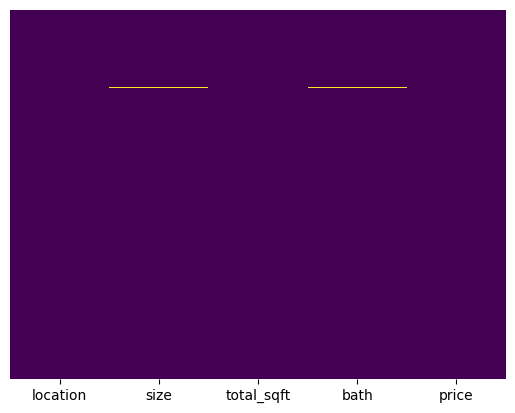

In [155]:
sns.heatmap(df2.isnull(),cbar=False,yticklabels=False,cmap='viridis')

Fill the na values with median 

In [156]:
df2['bath'].median()

np.float64(2.0)

In [157]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [158]:
import math 
median_bath=math.floor(df2['bath'].median())

In [159]:
median_bath

2

In [160]:
df2['bath']=df2['bath'].fillna(df2['bath'].median())

In [161]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

Drop the other na values

In [162]:
df3=df2.dropna()


In [163]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [164]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [165]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [166]:
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [167]:
df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\R.C\AppData\Local\Temp\ipykernel_13912\1156995945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [168]:
df3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [169]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [170]:
df3[df3['BHK']==43]

,location,size,total_sqft,bath,price,BHK
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [171]:
df3[df3['BHK']>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [172]:
df3['total_sqft'].value_counts()

total_sqft
1200     843
1100     221
1500     204
2400     195
600      180
        ... 
1443       1
886        1
16335      1
747        1
9200       1
Name: count, Length: 2110, dtype: int64

In [173]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2110,), dtype=object)

In [174]:
df3['total_sqft'].describe()

count     13303
unique     2110
top        1200
freq        843
Name: total_sqft, dtype: object

In [175]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [176]:
df3[df3['total_sqft'].apply(is_float)]
#it print the true values that can be float

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


I want to look at the values where it is nit a valid float number

we use ~ this is a negate operation 

In [177]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [178]:
def convert_sqft_to_number(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [179]:
convert_sqft_to_number('2166')

2166.0

In [180]:
convert_sqft_to_number('1200 - 1470')

1335.0

In [181]:
convert_sqft_to_number('34.46Sq. Meter')

In [182]:
df4=df3.copy()

In [183]:
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [184]:
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_number)

In [185]:
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [186]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

Feature Engineering

In [187]:
df5=df4.copy()

In [188]:
df5.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [189]:
df5['Price_Per_sqft']=df5['price']*100000/df5['total_sqft']

In [190]:
df5.head()

,location,size,total_sqft,bath,price,BHK,Price_Per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [191]:
df5['location'].value_counts()

location
Whitefield                         539
Sarjapur  Road                     397
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
KAMAKIYA                             1
Wheelers Road                        1
MM Layout                            1
Devarabeesana Halli                  1
beml layout, basaveshwara nagar      1
Name: count, Length: 1304, dtype: int64

In [192]:
df5['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1304,), dtype=object)

In [193]:
len(df5['location'].unique())

1304

In [194]:
df5['location']=df5['location'].apply(lambda x: x.strip())

In [195]:
df5['location'].value_counts()
df5.groupby('location')['location'].agg('count')

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [196]:
location_stat=df5['location'].value_counts().sort_values(ascending=False)

In [197]:
len(location_stat[location_stat<=10])

1052

In [198]:
location_stat_less_then_10=location_stat[location_stat<=10]

In [199]:
location_stat_less_then_10

location
1st Block Koramangala    10
Dairy Circle             10
Gunjur Palya             10
BTM 1st Stage            10
Nagadevanahalli          10
                         ..
pavitra paradise          1
kadubisnahalli            1
Rahmath Nagar             1
Chikkanahalli             1
Halanayakanahalli         1
Name: count, Length: 1052, dtype: int64

In [200]:
len(df5['location'].unique())

1293

In [201]:
df5['location']=df5['location'].apply(lambda x: 'other' if x in location_stat_less_then_10 else x)

In [202]:
len(df5['location'].unique())

242

Outlier Removel

In [203]:
df6=df5[~(df5['total_sqft']/df5['BHK']<300)]

In [204]:
df6.head()

,location,size,total_sqft,bath,price,BHK,Price_Per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [205]:
df5['Price_Per_sqft'].describe()

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: Price_Per_sqft, dtype: float64

In [206]:
def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.Price_Per_sqft)
        st=np.std(subdf.Price_Per_sqft)
        reduced_df=subdf[(subdf.Price_Per_sqft>(m-st)) & (subdf.Price_Per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [207]:
df6=remove_pps_outlier(df5)

In [208]:
df6.shape

(11475, 7)

In [209]:
def remove_bhk_outlier(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.Price_Per_sqft),
                'std':np.std(bhk_df.Price_Per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.Price_Per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7=remove_bhk_outlier(df6)
df7.shape


(8032, 7)

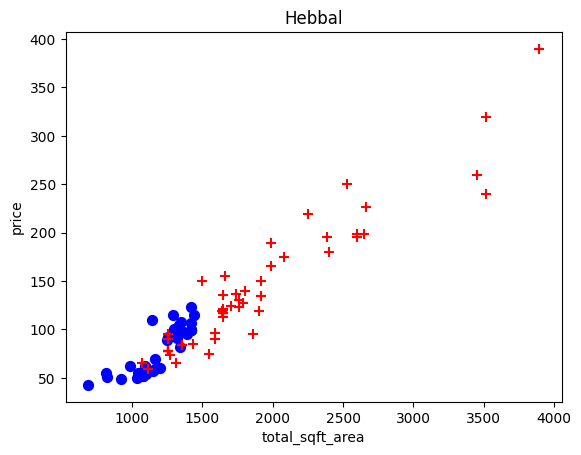

In [210]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location==location) & (df.BHK==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',label='3 BHK',s=50,marker='+')
    plt.xlabel('total_sqft_area')
    plt.ylabel('price')
    plt.title(location)
   # plt.lagend()
plot_scatter_chart(df6,'Hebbal')

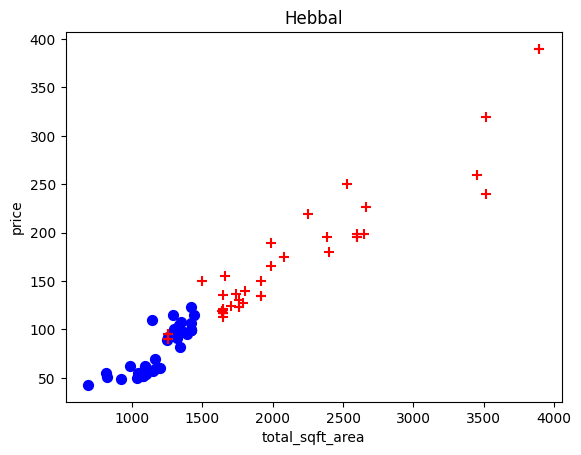

In [211]:
plot_scatter_chart(df7,'Hebbal')

(array([4.878e+03, 2.335e+03, 5.540e+02, 1.740e+02, 5.500e+01, 2.300e+01,
        9.000e+00, 0.000e+00, 1.000e+00, 3.000e+00]),
 array([ 1300.,  6485., 11670., 16855., 22040., 27225., 32410., 37595.,
        42780., 47965., 53150.]),
 <BarContainer object of 10 artists>)

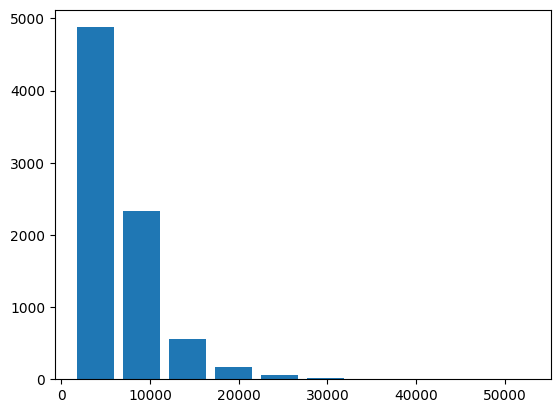

In [212]:
plt.hist(df7['Price_Per_sqft'],rwidth=0.8)

In [213]:
df7['bath'].unique()

array([ 4.,  3.,  6.,  2.,  5.,  1.,  8.,  7.,  9., 10., 12., 14., 27.,
       16., 15., 13., 18.])

In [214]:
df7[df7['bath']==27]

,location,size,total_sqft,bath,price,BHK,Price_Per_sqft
8992,other,27 BHK,8000.0,27.0,230.0,27,2875.0


(array([6.820e+03, 1.109e+03, 7.000e+01, 2.200e+01, 5.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  3.6,  6.2,  8.8, 11.4, 14. , 16.6, 19.2, 21.8, 24.4, 27. ]),
 <BarContainer object of 10 artists>)

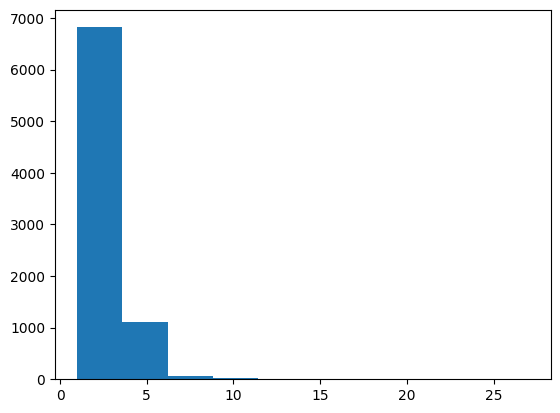

In [215]:
plt.hist(df7['bath'])

In [216]:
df7[df7.bath>df7.bath+2]

,location,size,total_sqft,bath,price,BHK,Price_Per_sqft


In [217]:
df8=df7.drop(['size','Price_Per_sqft'],axis=1)

In [218]:
df8.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,930.0,4.0,85.0,7


In [219]:
df8.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,930.0,4.0,85.0,7


Model Building

In [220]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8032 entries, 0 to 11474
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    8032 non-null   object 
 1   total_sqft  8032 non-null   float64
 2   bath        8032 non-null   float64
 3   price       8032 non-null   float64
 4   BHK         8032 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 376.5+ KB


Location convert into numeric column 

In [221]:
dummies=pd.get_dummies(df8['location'])

In [222]:
df9=pd.concat([df8,dummies.drop('other',axis=1)],axis=1)

In [223]:
df9.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1200.0,6.0,125.0,6,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,930.0,4.0,85.0,7,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [224]:
df10=df9.drop('location',axis=1)

In [225]:
df10.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,6.0,125.0,6,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,930.0,4.0,85.0,7,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [226]:
x=df10.drop('price',axis=1)

In [227]:
x.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,6.0,6,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,930.0,4.0,7,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [228]:
y=df10['price']

In [229]:
y.head()

0    428.0
1    194.0
2    125.0
3    235.0
4     85.0
Name: price, dtype: float64

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [232]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7824799532146431

In [233]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.70409739, 0.72674275, 0.72614221, 0.67531372, 0.67532646])

In [234]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos={
        'LinearRegression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }


In [235]:
from sklearn.model_selection import GridSearchCV

In [236]:
algos = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1, 2],
            'selection': ['random', 'cyclic']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
        }
    }
}

scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(x, y)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })

# Display the DataFrame with the results
pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

c:\Users\R.C\.conda\envs\Machine_Learning\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\R.C\.conda\envs\Machine_Learning\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\R.C\.conda\envs\Machine_Learning\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\R.C\.conda\envs\Machine_Learning\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parame

,model,best_score,best_params
0,LinearRegression,0.701800,{'fit_intercept': False}
1,Lasso,0.623744,"{'alpha': 1, 'selection': 'random'}"
2,DecisionTree,0.402172,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [237]:
def pridict_price(location,sqft,bath,BHK):
    loc_index=np.where(x.columns==location)[0][0]

    x=np.zeros(len(x.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=BHK
    if loc_index >=0:
        x[loc_index]=1
    return lr.predict([x])[0]

In [238]:
pridict_price('1st Phase JP Nagar',1000,2,2)

UnboundLocalError: local variable 'x' referenced before assignment